In [1517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1518]:
# This is the 2022-2023 NBA Player Stats for the season
# This dataset was obtained off of kaggle
# This is the link to the dataset 
# https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular?resource=download
# The license is an Attribution 4.0 International CC so that just means
# the dataset can be shared, transformed, and remixed in any way as long
# as credit is given by providing the dataset link
# The dataset's file size is 34kb and has rows 679 of data


In [1519]:
df = pd.read_csv("NBA Dataset.csv", encoding='windows-1252')
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [1520]:
# This is to see if the dataset updated when players got traded to another team
player_one = df.loc[df['Player'] == 'Mikal Bridges']
player_one

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
77,58,Mikal Bridges,SF,26,TOT,83,83,35.7,7.1,15.3,...,0.895,1.0,3.4,4.4,3.3,1.1,0.7,1.5,1.9,20.1
78,58,Mikal Bridges,SF,26,PHO,56,56,36.4,6.3,13.6,...,0.897,1.0,3.3,4.3,3.6,1.2,0.8,1.4,2.1,17.2
79,58,Mikal Bridges,SF,26,BRK,27,27,34.2,8.9,18.6,...,0.894,0.9,3.6,4.5,2.7,1.0,0.6,1.8,1.6,26.1


Text(0.5, 1.0, 'Relationship Between Points per Game and Age')

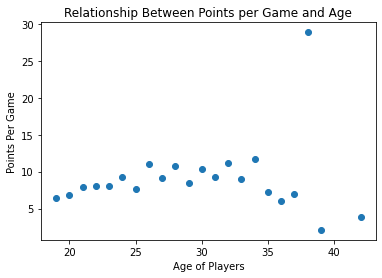

In [1521]:
# VISUALIZATION 1 General Public
# This visualization is intended to show points scored by players on average based off their age
# There is a good reason for why age 38 looks like an outlier
# If you know a little about a certain basketball player you might be able to figure out why that value is so high

# tot_pts = df['PTS'].groupby(df['Rk'])
# tot_pts.mean()
# age_df = df.groupby(['Age', 'PTS']).size().reset_index()
# age_df.drop(columns=pts_df.columns[-1],  axis=1,  inplace=True)
# age_df.groupby('Age').mean()

ages = []
for i in range(24):
    ages.append(i + 19)

age_df = df.groupby('Age')['PTS'].mean()
age_df = pd.DataFrame(age_df, index = ages, columns =['Age', 'PTS'])
age_df['Age'] = ages

age_df = age_df.drop(index = 40)
age_df = age_df.drop(index = 41)

plt.scatter(age_df['Age'], age_df['PTS'])

plt.xlabel("Age of Players")
plt.ylabel("Points Per Game")
plt.title('Relationship Between Points per Game and Age')

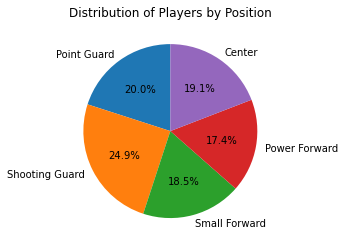

In [1522]:
# VISUALIZATION 2 General Public
# There were just under 10 players who had two positions listed so for simplicity I didn't include those
pos_df = df.groupby('Pos').count()
pos_df
pos_total = np.array([135, 168, 125, 117, 129])
pos_labels = ['Point Guard', 'Shooting Guard', 'Small Forward', 'Power Forward', 'Center']
plt.pie(pos_total, labels = pos_labels, startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Players by Position')
plt.show()

In [1523]:
# I was going to do a bar chart showing teams with the highest steals per game but it was difficult since
# traded players affected the true result of the data.

# stl_df = df.groupby('Tm')['STL'].sum()
# print(stl_df)
# stl_df = pd.DataFrame(stl_df, columns =['STL'])
# stl_df.reset_index(inplace=True)

# top_ten = stl_df.nlargest(10, ['STL'])
# sorted_ten = top_ten.sort_values('STL')

# plt.bar(sorted_ten['Tm'], sorted_ten['STL']) 

# plt.title('Top Ten Teams In Steals')
# plt.xlabel('Team Name')
# plt.ylabel('Steals per game')
# Show Plot
# plt.show()

In [1524]:
# I was thrown off by TOT at first because that didn't look like any NBA team I know. After doing some searching
# I found out that TOT just stands for total. The reason some players have this row of data is because they have
# been traded to a different team during the season
plyr_trd = df.loc[df['Tm'] == 'TOT']
plyr_trd
plyr_trd_name = pd.DataFrame()
plyr_trd_name['Player'] = plyr_trd['Player']
plyr_trd_name.reset_index()

,index,Player
0,5,Nickeil Alexander-Walker
1,16,Ryan Arcidiacono
2,25,Mo Bamba
3,35,Will Barton
4,41,Darius Bazley
...,...,...
65,606,Juan Toscano-Anderson
66,615,Jarred Vanderbilt
67,631,T.J. Warren
68,642,Russell Westbrook


In [1525]:
not_trd_plyr = pd.DataFrame()
not_trd_plyr = df['Player']

not_trd_plyr.drop_duplicates(inplace=True)
not_trd_plyr.reset_index()

tot_trd = len(plyr_trd_name)
tot_not_trd = len(not_trd_plyr) - 70



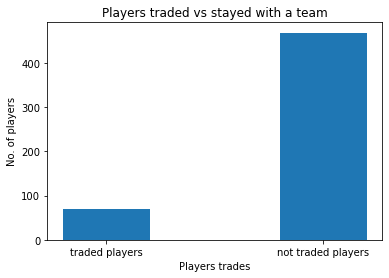

In [1526]:
# VISUALIZATION 3 General Public
# graph to show how many players get traded compared to how many don't
trd_data = {'traded players':tot_trd, 'not traded players':tot_not_trd}

trade_val = list(trd_data.keys())
total_trds = list(trd_data.values())

plt.bar(trade_val, total_trds,
        width = 0.4)
 
plt.xlabel("Players trades")
plt.ylabel("No. of players")
plt.title("Players traded vs stayed with a team")
plt.show()

In [1527]:
# Going to create a data frame containing the 16 teams who made it to the playoffs this season
playoff_teams = ['MIL', 'MIA', 'CLE', 'NYK', 'PHI', 'BRK', 'BOS', 'ATL', 'DEN',
                 'MIN', 'PHO', 'LAC', 'SAC', 'GSW', 'MEM', 'LAL']
playoff_df = pd.DataFrame()
playoff_df = df.loc[df['Tm'].isin(playoff_teams)]
playoff_df.reset_index()

,index,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
1,2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
2,4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
3,7,6,Nickeil Alexander-Walker,SG,24,MIN,23,0,15.5,2.1,...,0.619,0.3,1.5,1.8,1.4,0.3,0.3,0.4,1.3,5.9
4,8,7,Grayson Allen,SG,27,MIL,72,70,27.4,3.4,...,0.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,668,530,James Wiseman,C,21,GSW,21,0,12.5,2.8,...,0.684,0.9,2.6,3.5,0.7,0.1,0.3,0.7,1.9,6.9
316,675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
317,676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
318,677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [1528]:
# data frame with all nba teams
nba_teams = pd.DataFrame()

nba_teams['Team'] = df['Tm']

nba_teams = nba_teams.drop_duplicates()
nba_teams = nba_teams[nba_teams.Team != 'TOT']

nba_teams = nba_teams.reset_index()
nba_teams = nba_teams.head(30)

nba_teams['Team']

0     TOR
1     MEM
2     MIA
3     UTA
4     MIN
5     MIL
6     CLE
7     NOP
8     ORL
9     NYK
10    POR
11    WAS
12    PHO
13    DET
14    GSW
15    CHO
16    LAL
17    SAS
18    SAC
19    LAC
20    OKC
21    DAL
22    CHI
23    ATL
24    IND
25    DEN
26    BRK
27    BOS
28    PHI
29    HOU
Name: Team, dtype: object

In [1529]:
# Grouping players by teams and finding the highest average free throw, field goal, and three point percentages
df.dropna(inplace = True)
team_df = df.groupby('Tm')
current_team = ''

ft_ls = []
three_ls = []
fg_ls = []

for i in range(30):
    current_team = team_df.get_group(nba_teams['Team'][i])
    
    ft_ls.append(current_team['FT%'].mean())
    three_ls.append(current_team['3P%'].mean())
    fg_ls.append(current_team['FG%'].mean())

scoring_df = pd.DataFrame(list(zip(nba_teams['Team'], ft_ls, three_ls, fg_ls)),
               columns =['Team', 'Free Throw %', 'Three Point %', 'Field Goal %'])
large_ft = scoring_df.nlargest(16, "Free Throw %")
large_fg = scoring_df.nlargest(16, "Field Goal %")
large_three = scoring_df.nlargest(16, "Three Point %")

ft_count = 0
fg_count = 0
three_count = 0

for i in large_ft['Team']:
    if i in playoff_teams:
        ft_count += 1

for i in large_fg['Team']:
    if i in playoff_teams:
        fg_count += 1

for i in large_three['Team']:
    if i in playoff_teams:
        three_count += 1
        
print(fg_count)
print(ft_count)
print(three_count)

7
9
8


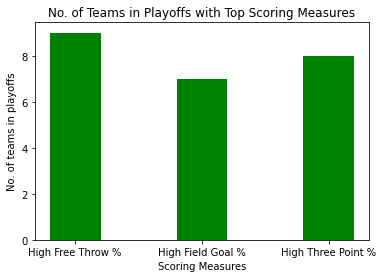

In [1530]:
# VISUALIZATION 1 Peers
scoring_data = {'High Free Throw %':ft_count, 'High Field Goal %': fg_count, 'High Three Point %': three_count}

scoring_vals = list(scoring_data.keys())
total_scoring = list(scoring_data.values())

plt.bar(scoring_vals, total_scoring, color = 'green',
        width = 0.4)
 
plt.xlabel("Scoring Measures")
plt.ylabel("No. of teams in playoffs")
plt.title("No. of Teams in Playoffs with Top Scoring Measures")
plt.show()

In [1531]:
# Data frame with players who started most games
starters_df = df[(df.G > 35) & (df.GS >= 50)]
starters_df

bench_df = df[(df.G >= 35) & (df.GS < 50)]
bench_df

# used to remove extra rows that aren't a part of the dataset
starters_df = starters_df[starters_df['MP'] < 50]
bench_df = bench_df[bench_df['MP']  < 40]

strs_avg_min = starters_df['MP'].mean()
bnch_avg_min = bench_df['MP'].mean()

strs_avg_min

31.700740740740763

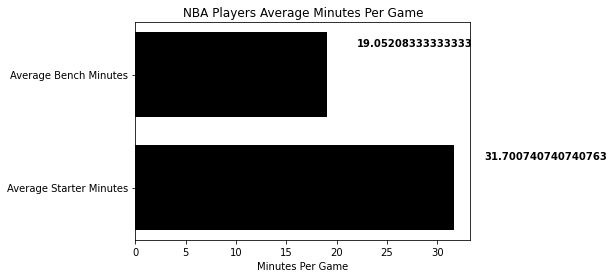

In [1532]:
# VISUALIZATION 2 Peers
import os
scoring_data = {'Average Starter Minutes':strs_avg_min, 'Average Bench Minutes': bnch_avg_min}

player_vals = list(scoring_data.keys())
avg_mins = list(scoring_data.values())
fig, ax = plt.subplots()
width = 0.75
ax.barh(player_vals, avg_mins, width, color = "black")

plt.xlabel("Minutes Per Game")
plt.title("NBA Players Average Minutes Per Game")

for i, v in enumerate(avg_mins):
    ax.text(v + 3, i + .25, str(v), color = 'black', fontweight = 'bold')
plt.show()

In [1533]:
pos = ['PG', 'SG', 'SF', 'PF', 'C']

pos_df = df.groupby('Pos')['AST', 'PTS', 'TRB'].mean()
pos_df = pd.DataFrame(pos_df, index = pos, columns =['AST', 'PTS', 'TRB'])
pos_df
#pos_df = df.groupby('Pos')
#pos_df['PTS'].mean()

,AST,PTS,TRB
PG,3.661481,9.935556,2.685926
SG,1.892262,8.636905,2.453571
SF,1.539200,8.828800,3.132800
PF,1.586325,8.840171,4.176068
C,1.272093,7.944186,5.220930


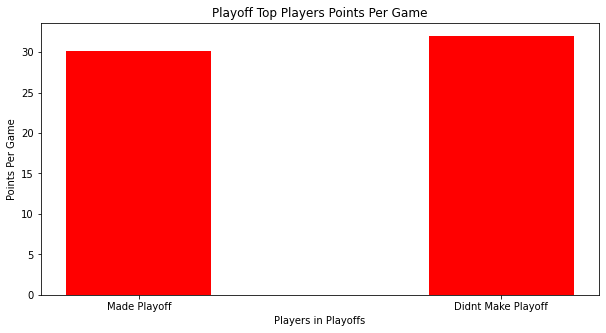

In [1534]:
# VISUALIZATION 3 Peers
# dataframe with the top 20 scorers of the league
from statistics import mean
import warnings
  
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')
df = df[(df['Tm'] != 'TOT') & (df['G'] > 25)] # used to eliminate player duplicates that were traded

top_pts_df = df.nlargest(10, ['PTS'])

playoff_player = []
playoff_pts = []
not_playoff_player = []
not_playoff_pts = []

for i in top_pts_df.index:
    if top_pts_df['Tm'][i] in playoff_teams:
        playoff_pts.append(top_pts_df['PTS'][i])
        playoff_player.append(top_pts_df['Player'][i])
    
    if top_pts_df['Tm'][i] not in playoff_teams:
        not_playoff_pts.append(top_pts_df['PTS'][i])
        not_playoff_player.append(top_pts_df['Player'][i])

players = ['Made Playoff', 'Didnt Make Playoff']
values = [mean(playoff_pts), mean(not_playoff_pts)]
  
fig = plt.figure(figsize = (10, 5))    
# creating the bar plot
plt.bar(players, values, width = 0.4, color = 'red')

plt.xlabel("Players in Playoffs")
plt.ylabel("Points Per Game")

plt.title("Playoff Top Players Points Per Game")
plt.show()

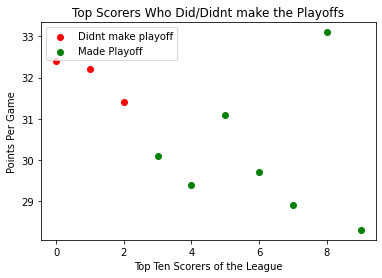

In [1535]:
# VISUALIZATION 1 Individual
#
import random

random.shuffle(playoff_pts) # shuffled just so the values weren't in descending order

x = [0,1,2]
key = x
values = not_playoff_pts 

plt.scatter(key, values, c='red', label = 'Didnt make playoff')

x_2 = [3,4,5,6,7,8,9]
key_2 = x_2
values_2 = playoff_pts
# creating the bar plot


plt.scatter(key_2, values_2, c='green', label = 'Made Playoff')

plt.xlabel('Top Ten Scorers of the League')
plt.ylabel('Points Per Game')

plt.title('Top Scorers Who Did/Didnt make the Playoffs')
plt.legend()

plt.show()

            Age       TOV
Team                     
OKC   22.933333  1.033333
HOU   23.400000  1.353333
ORL   23.562500  1.256250
MEM   23.785714  1.235714
IND   24.083333  1.333333
SAS   24.176471  1.317647
POR   24.333333  1.483333
CHO   24.333333  1.413333
DET   24.923077  1.361538
NYK   25.250000  1.158333
NOP   25.307692  1.507692
MIN   25.357143  1.421429
ATL   25.384615  1.100000
TOR   25.846154  1.115385
SAC   26.071429  1.057143
GSW   26.307692  1.469231
UTA   26.357143  1.428571
WAS   26.866667  1.266667
LAL   27.062500  1.268750
DEN   27.071429  1.271429
CLE   27.076923  1.200000
CHI   27.083333  1.183333
DAL   27.533333  1.053333
BOS   27.583333  1.291667
PHO   27.642857  1.250000
PHI   27.692308  1.207692
MIA   27.916667  1.375000
BRK   28.352941  1.323529
LAC   29.230769  1.315385
MIL   29.466667  1.253333


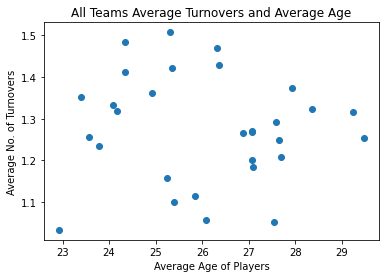

In [1536]:
# VISUALIZATION 2 Individual
# I wish I could have found a way to make it so each point showed what corresponding team it was a part of
team_df = df.groupby('Tm')['Age', 'TOV'].mean()
team_df = pd.DataFrame(team_df, index = nba_teams['Team'], columns =['Age', 'TOV'])
team_df = team_df.sort_values(by=['Age'])
print(team_df)
x = team_df['Age']
# three random walks
y = team_df['TOV']
plt.scatter(x, y)
plt.xlabel('Average Age of Players')
plt.ylabel('Average No. of Turnovers')
plt.title('All Teams Average Turnovers and Average Age')
plt.show()

In [1537]:
# VISUALIZATION 3 Individual
# I tried adding labels or a legend but neither seem to work
import bqplot.pyplot as plt

pos_arr = [[3.66, 1.89, 1.54, 1.59, 1.27],
           [9.94, 8.64, 8.83, 8.84, 7.94],
           [2.69, 2.45, 3.13, 4.18, 5.22]]

fig = plt.figure(title="Stacked Bar Chart")
x = pos
y = pos_arr

stacked_bar = plt.bar(x, y, type="stacked", padding=.4,
                      colors=["red", "blue", "yellow"])
plt.xlabel("Basketball Positions")
plt.ylabel("Assists, Points, Total Rebounds")
plt.title("Points, Assists, and Rebounds of Basketball Positions")

fig

Figure(axes=[Axis(label='Basketball Positions', scale=OrdinalScale()), Axis(label='Assists, Points, Total Rebo…